<h2>Project</h2>
Steps taken for data cleaning
<ul>
    <li>Dropped columns which provided no significant information like 'URL' and 'Icon URL'</li>
    <li>Identified the null values and substituted them with data of suitable data formats</li>
    <li>Dropped rows with User Rating Count&lt;100 to provide a better insight to a broder prespective of data
                                                </li>
</ul>

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
file=pd.read_csv('appstore_games.csv')


In [ ]:
file.drop(['URL','Icon URL'],axis=1,inplace=True)

In [4]:
file.drop(file.loc[file['User Rating Count']<100].index,inplace=True)
file

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
7,286363959,Colony,NaN,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,1474919257,EachOther,NaN,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,1474962324,Rabbit Vs Tortoise,NaN,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,1474963671,FaTaLL,Most fun game!!!,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


Dropping all rows with User Rating Count<100 so as to remove biased inputs

In [5]:
for col in file.columns:
    if file[col].isnull().any():
        if(file[col].dtypes=='float64'):
            file[col].fillna(0.0,inplace=True)
        elif(file[col].dtypes=='O'):
            file[col].fillna('NoData',inplace=True)


In [6]:
file.columns

Index(['ID', 'Name', 'Subtitle', 'Average User Rating', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [7]:
maind=file[file['Average User Rating']>=4].copy()

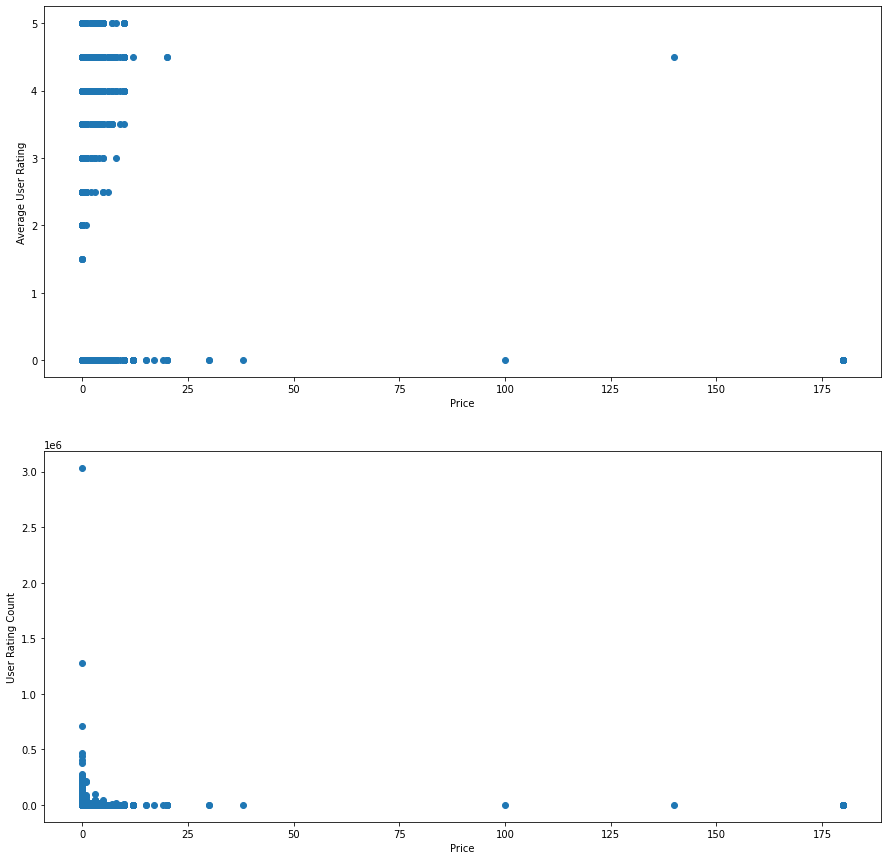

In [8]:
fig,(ax1,ax2) = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax1.scatter(file['Price'],file['Average User Rating'])

ax1.set_xlabel('Price')
ax1.set_ylabel('Average User Rating')
ax2.scatter(file['Price'],file['User Rating Count'])
ax2.set_xlabel('Price')
ax2.set_ylabel('User Rating Count')

plt.show()


From the above graphs , we can interpret that generally higher user ratings are found in the price bracket of 0-25. From the second graph we can interpret that most User Rating count can be found in a similar bracket.
From the above to inferences , we can interpret that the public prefers games within the price bracket of 0-25.

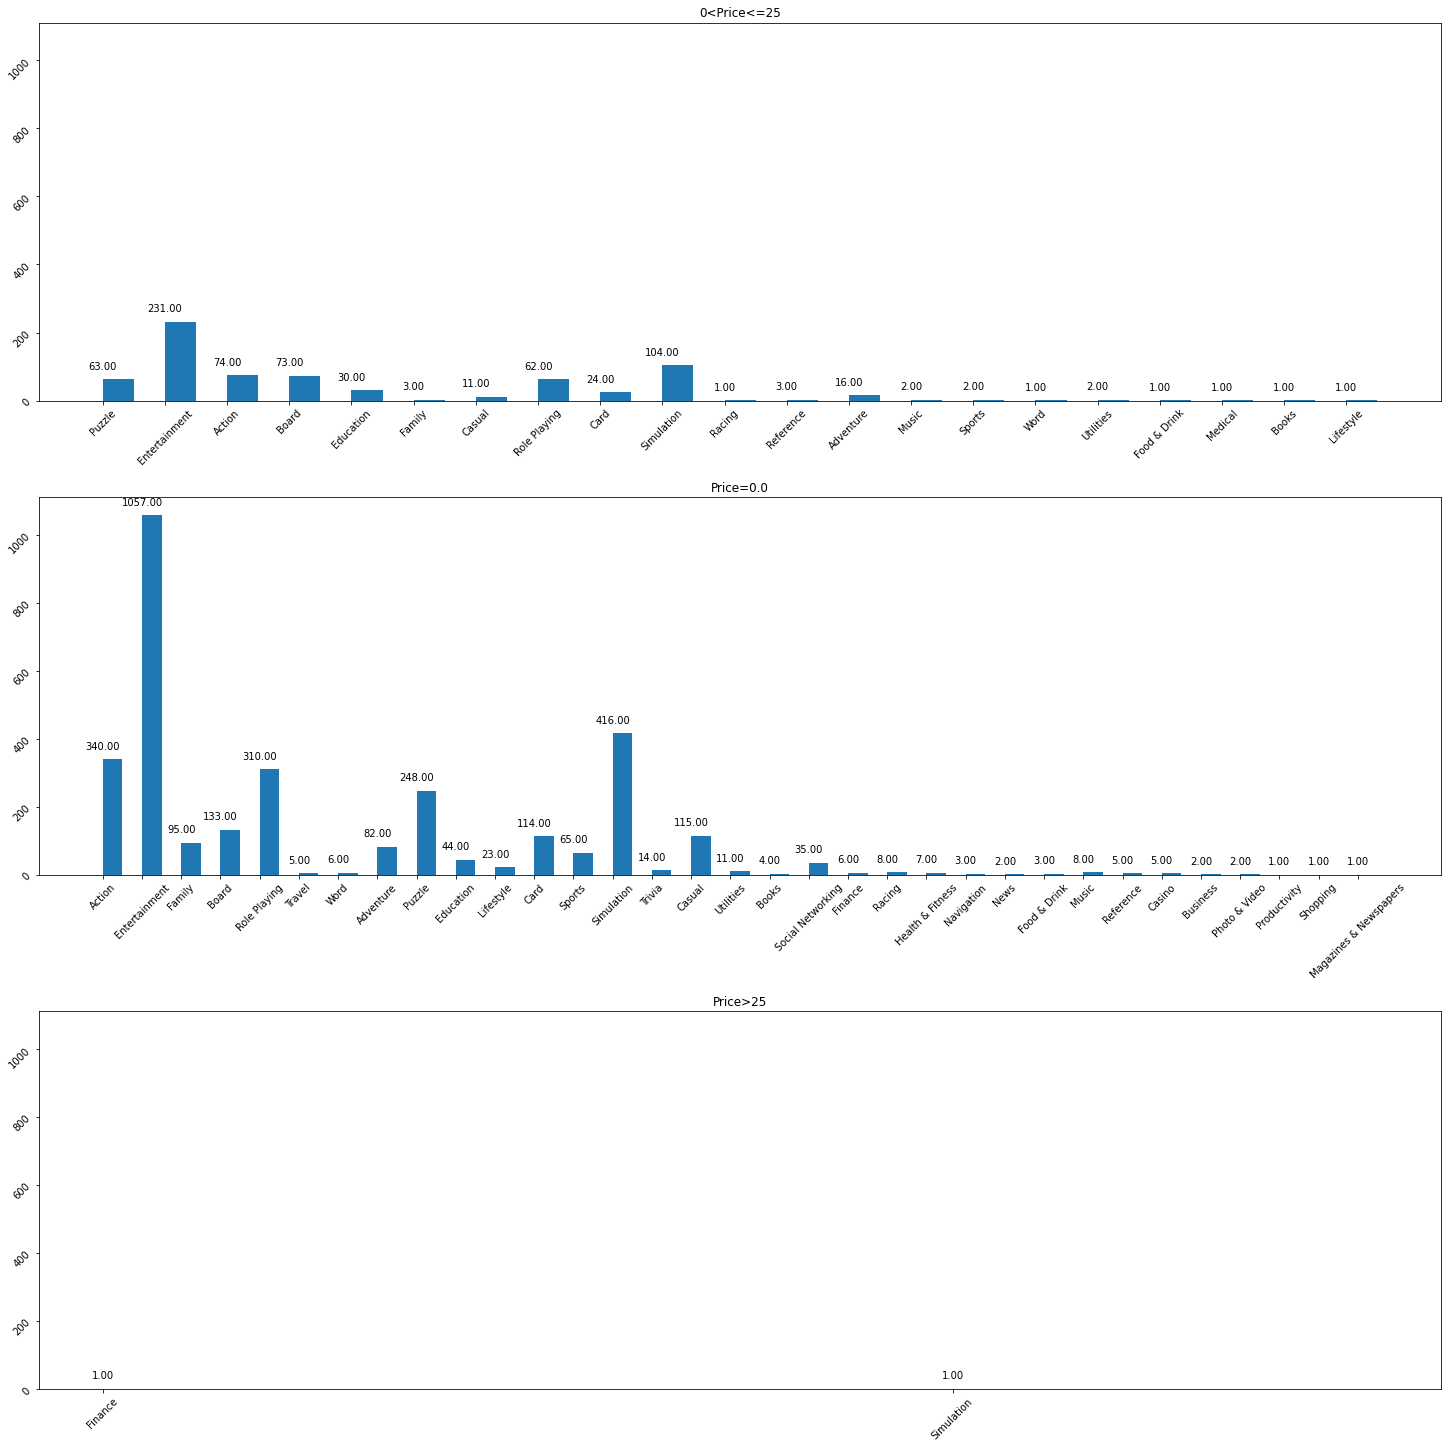

In [9]:
f=file[(file['Average User Rating']>=4) & (file['Price']<=25) & (file['Price']>0)]['Genres']
g=file[(file['Average User Rating']>=4) & (file['Price']>25)]['Genres']
h=file[(file['Average User Rating']>=4) & (file['Price']==0)]['Genres']
eh={}    
ef={}
eg={}


fig, axs = plt.subplots(3, constrained_layout=True,sharey=True)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in f:
    i=i.strip()
    temp=i.split(',')
    for j in temp:
        j=j.strip()
        if (j in ef):
            ef[j]+=1
        else:
            ef[j]=1
    temp=[]
for i in g:
    temp=i.split(',')
    
    for j in temp:
        j=j.strip()
        if (j in eg):
            eg[j]+=1
        else:
            eg[j]=1
    temp=[]
for i in h:
    temp=i.split(',')
   
    
    for j in temp:
        j=j.strip()
        if (j in eh):
            eh[j]+=1
        else:
            eh[j]=1
    temp=[]

for i in range(3):
    axs[i].tick_params(labelrotation=45)

del ef['Games']
del ef['Strategy']
del eg['Games']
del eg['Strategy']
del eh['Games']
del eh['Strategy']
axs[0].bar(ef.keys(),ef.values(),align='edge',width=0.5)

for x,y in zip(ef.keys(),ef.values()):

    label = "{:.2f}".format(y)

    axs[0].annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

axs[1].bar(eh.keys(),eh.values(),align='edge',width=0.5)
for x,y in zip(eh.keys(),eh.values()):

    label = "{:.2f}".format(y)

    axs[1].annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
axs[2].bar(eg.keys(),eg.values(),align='edge',width=0.5)
for x,y in zip(eg.keys(),eg.values()):

    label = "{:.2f}".format(y)

    axs[2].annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
axs[2].set_title('Price>25')
axs[0].set_title('0<Price<=25')
axs[1].set_title('Price=0.0')



# plt.bar(e.keys(),e.values(),align='edge',width=0.5)
plt.show()



As can be seen from above graphs, for range Price>25 and Average User Rating>=4 , we don't have much data. On the other hand in the range 0=<Price<25, we have significant data for study.
On analysing the data within the range of 0<Price=<25, The top genres happen to be Puzzle,Entertainment,Role Playing,Action and Stimulation whereas where the price is 0, The top Genres are Entertainment,Action,Board,Puzzle,Stimulation,Role Playing.
So from this we can draw 2 conclusions:
1. As the price is increasing, the data available is decreasing as the consumer is not much interested in expensive games
2. From the intersection of most popular Genres among the compared price ranges, Within the range 0-25; Entertainment,Puzzle,Stimulation,Role Playing,Action are the genres of games more likely to be bought by the consumer.

In [10]:
pd.value_counts(file[(file['Average User Rating']>=4)]['Age Rating'])

4+     1173
12+     604
9+      575
17+      87
Name: Age Rating, dtype: int64

Text(0, 0.5, 'Price')

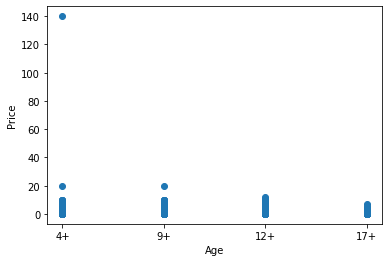

In [11]:
plt.scatter(file[(file['Average User Rating']>=4)]['Age Rating'],file[(file['Average User Rating']>=4)]['Price'])
plt.xlabel('Age')
plt.ylabel('Price')

From the above plots we know that audience of lower age groups is more interested in buying games and is more willing to spend money for the same. So the target age group should be from 4-12 years

In [12]:
file['Size']=file['Size']/(10**9)

Bringing game size to a smaller value

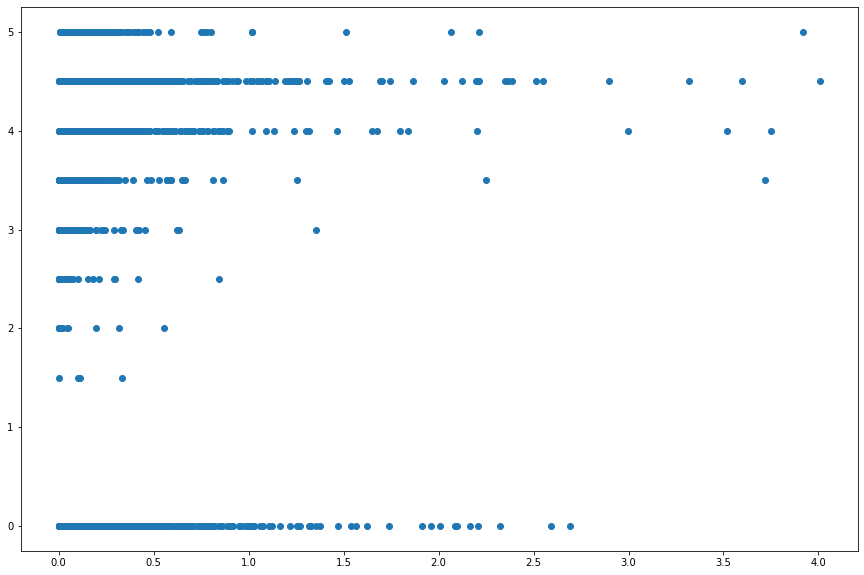

In [13]:
fig=plt.figure(figsize=(15, 10))
plt.scatter(file['Size'],file['Average User Rating'])
plt.show()

As can be seen, our required range of Average User Rating i.e. >=4 is majorly found with game sizes less than 2 if we were to take a ballpark guess based on the graph. So based on the data, we can assume that the user is more likely to download and play a game within the size range of <=1.5
But on the other hand it can be seen that higher the size, less likely is the game to fall in the category of lower Average User Ratings. It can be because of more content in the game too make it appealing which in turn increases the size.
A balance point considering the above 2 arguments would be a game with 1<=size<=2.5

In [14]:
lang={}
temp=[]
for i in file[file['Average User Rating']>=4]['Languages']:
    temp=i.split(',')
    for j in temp:
        j=j.strip()
        if j in lang:
            lang[j]+=1
        else:
            lang[j]=1


In [15]:
for key, value in sorted(lang.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

AM: 1
AS: 1
AY: 1
BR: 1
DZ: 1
EO: 1
FO: 1
GD: 1
KL: 1
GN: 1
IU: 1
JV: 1
KS: 1
RW: 1
KY: 1
RN: 1
KU: 1
LA: 1
MG: 1
MT: 1
GV: 1
MN: 1
OR: 1
OM: 1
QU: 1
SA: 1
SD: 1
SO: 1
SU: 1
TT: 1
BO: 1
TI: 1
TO: 1
UG: 1
CY: 1
YI: 1
AZ: 2
EU: 2
BE: 2
GL: 2
KA: 2
GA: 2
KK: 2
NE: 2
PS: 2
SW: 2
TG: 2
TK: 2
UZ: 2
KM: 2
LO: 2
KR: 2
IS: 3
SI: 3
MY: 3
NN: 3
SE: 3
NoData: 3
AF: 4
BS: 4
MK: 4
SQ: 5
ET: 5
TL: 5
LT: 6
UR: 6
HY: 8
SR: 10
ML: 16
PA: 17
TE: 17
LV: 18
GU: 19
MR: 19
NO: 20
KN: 20
TA: 20
SL: 21
BN: 23
BG: 29
FA: 34
HR: 37
HI: 48
CA: 79
SK: 81
UK: 85
HU: 89
HE: 93
RO: 94
MS: 118
EL: 124
FI: 130
NB: 137
CS: 143
DA: 159
VI: 162
AR: 164
ID: 207
SV: 210
TH: 228
PL: 260
NL: 291
TR: 359
KO: 587
PT: 599
IT: 629
RU: 661
JA: 697
ES: 759
FR: 792
DE: 815
ZH: 1334
EN: 2426


From the above outcome, we can interpret that the most popular languages are EN,ZH,DE,FR,ES and so on

In [16]:
file.columns

Index(['ID', 'Name', 'Subtitle', 'Average User Rating', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [17]:
file['Original Release Date']=pd.to_datetime(file['Original Release Date'])

In [18]:
file['Current Version Release Date']=pd.to_datetime(file['Current Version Release Date'])

In [19]:
file['date_diff']=file['Current Version Release Date']-file['Original Release Date']


In [20]:
file['date_diff']=file['date_diff'].dt.days

In [21]:
dayData=file.loc[(file['date_diff']>=100)&(file['User Rating Count']>10000)]

Taking data where the difference between current version and launched version is more than 180 days because:
1. It might be minor bug fixes of the same game if the new update is released shortly after releasing the game.
2. It might be a relatively new game, hence a new parameter is added if the User Rating Count is > 10000, only then the dataset must be considered

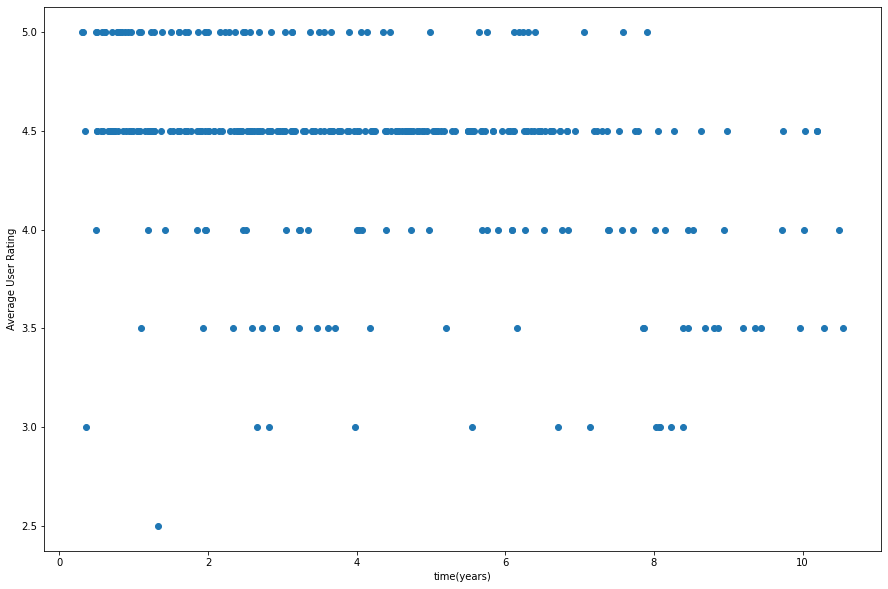

In [22]:
fig=plt.figure(figsize=(15, 10))
plt.scatter(dayData['date_diff']/365,dayData['Average User Rating'])
plt.xlabel('time(years)')
plt.ylabel('Average User Rating')
plt.show()

Considering our parameters i.e. Average user Rating>=4, we can see that the games getting regular updates in shorter duration of time tend to outnumber the games getting updates over large periods. So an average update time of 2-4 years is recommended to maintaing better average user rating.

<h1>Outcomes</h1>
    The following parameters must be taken care of for the average user rating to be >=4 
    <ul>
        <li>Age Bracket in 4-12 Years</li>
        <li>Price Bracet in 0-25</li>
        <li>Entertainment,Puzzle,Stimulation,Role Playing,Action are more popular genres</li>
        <li>Size of Game 1<=size<=2.5 on the scale 1e9</li>
        <li>EN,ZH,DE,FR,ES more popular languages</li>
        <li>Average update time 2-4 years recommended</li>
    </ul>

<h3>Trend of user Rating based on pricing</h3>

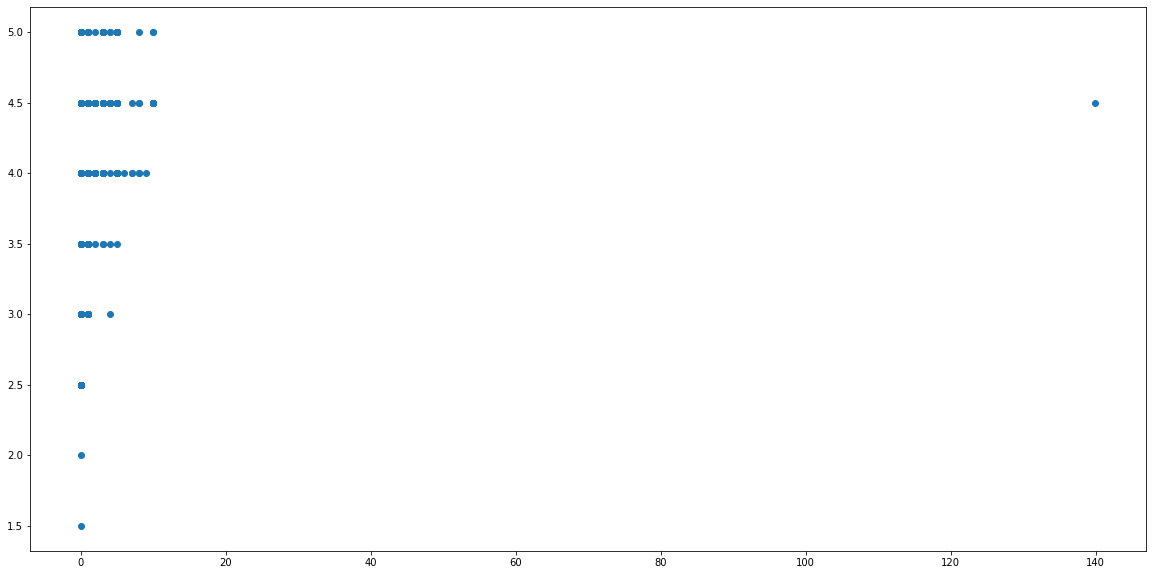

In [23]:
fig=plt.figure(figsize=(20,10))
plt.scatter(file[file['User Rating Count']>1000]['Price'],file[file['User Rating Count']>1000]['Average User Rating'])
plt.show()

As can be seen from above Graph, there is not much data for higher price ranges as the consumer is more comfortable in price range 0-20. User Rating Count is taken more than 1000 to get a broder prespective of the scenario. Within the price range of 0-20, with applied parameters, the frequency of games with higher user rating is more. As the price is increasing, the games with lower user rating also decrease. So with price, the quantity decreases but due to higher price, quality factor comes into play and leads to higher user ratings.

<h3>More On Genres</h3>

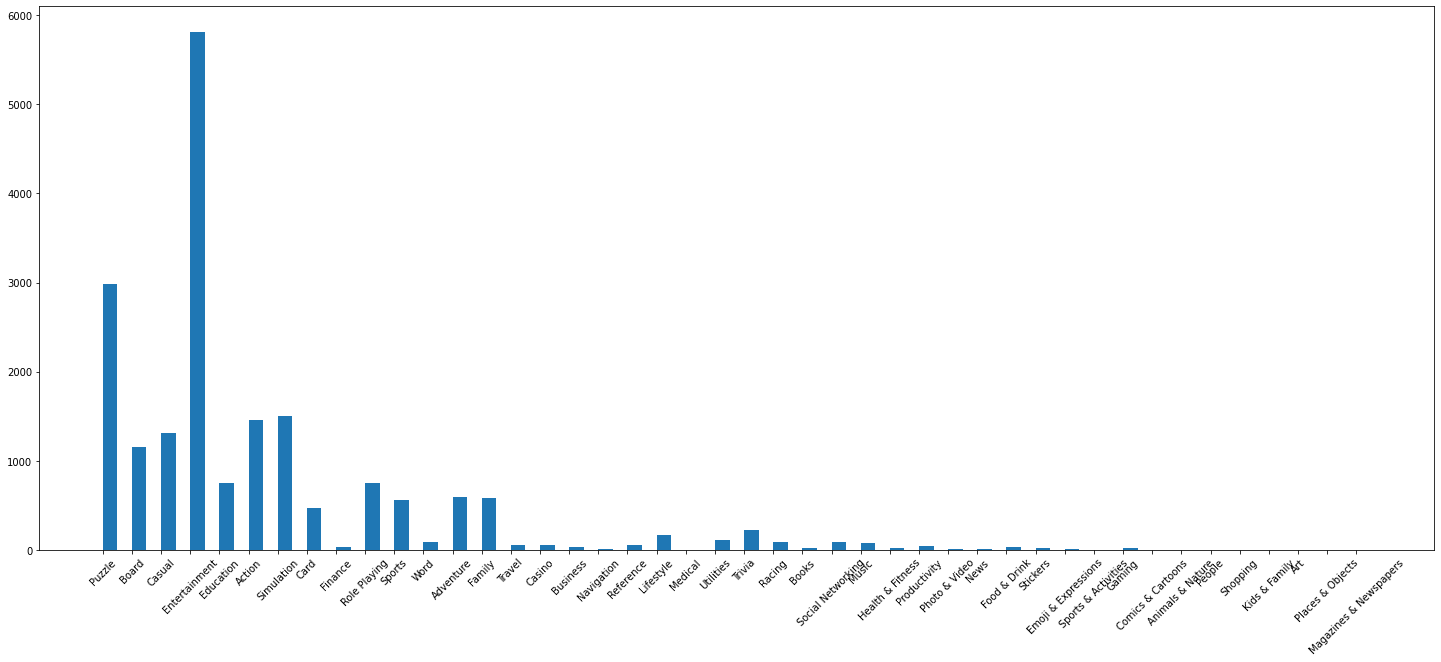

In [24]:
c=file['Genres']
gc={}
for i in c:
    temp=i.split(',')
    for j in temp:
        j=j.strip()
        if(j in gc):
            gc[j]+=1
        else:
            gc[j]=1
            
del gc['Games']
del gc['Strategy']
#games and strategy removed as they are present in every game
fig = plt.figure(figsize=(25, 10))

plt.xticks(rotation=45)

plt.bar(gc.keys(),gc.values(),align='edge',width=0.5)
plt.show()

In the overall scenario, the market is consists of games majorly of the genre Puzzle,Action,Stimulation,Board. 

In cases where user rating is >=4, the following is the outcome

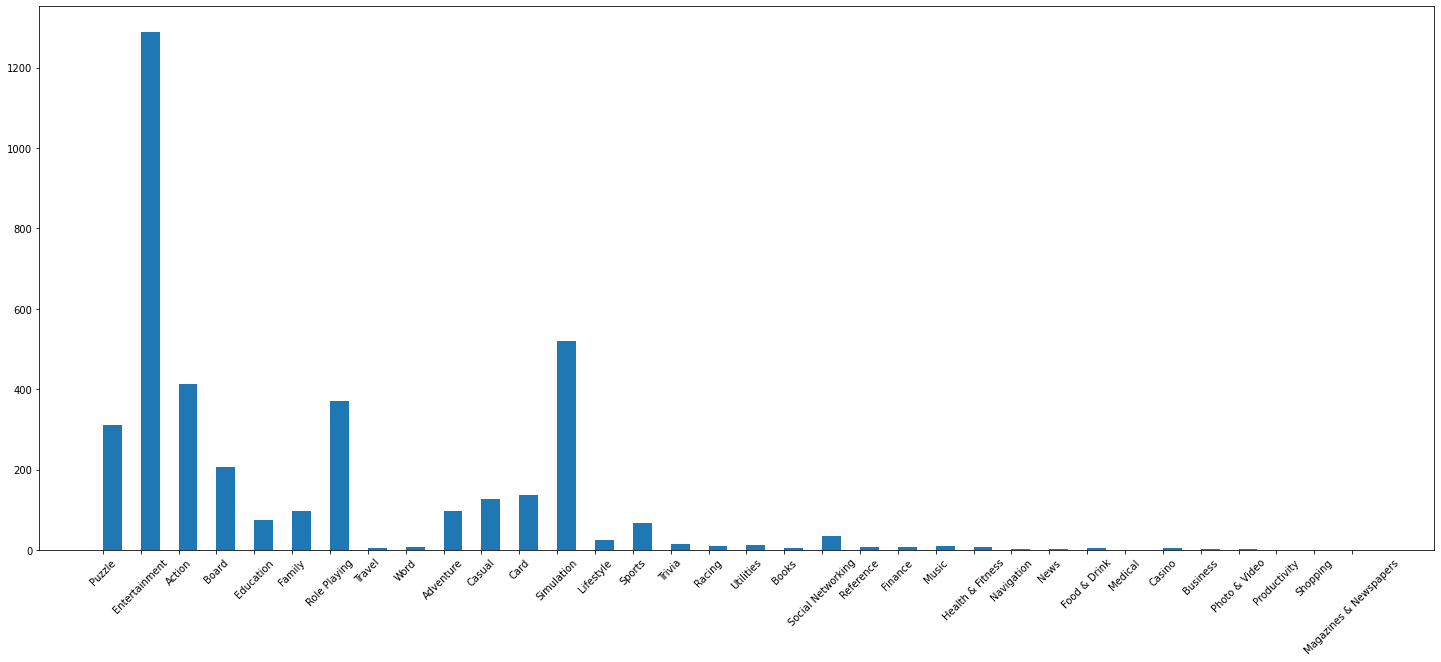

In [25]:
c=file[file['Average User Rating']>=4]['Genres']
gc={}
for i in c:
    temp=i.split(',')
    for j in temp:
        j=j.strip()
        if(j in gc):
            gc[j]+=1
        else:
            gc[j]=1
            
del gc['Games']
del gc['Strategy']
fig = plt.figure(figsize=(25, 10))

plt.xticks(rotation=45)

plt.bar(gc.keys(),gc.values(),align='edge',width=0.5)
plt.show()

The popular genre on applying the parameter of user rating>=4 are basically the same with a slight increase in some departments. That means the game developper are well aware of the consumer choices hence the most occuring genres are most likely to be the popular ones and have higher user rating

In [26]:
a=pd.value_counts(file[file['Average User Rating']>=4]['Genres'])
a

Games, Strategy, Simulation               121
Games, Simulation, Strategy               106
Games, Strategy, Action                    98
Games, Strategy, Role Playing              86
Games, Role Playing, Strategy              84
                                         ... 
Games, Casual, Strategy, Lifestyle          1
Games, Music, Strategy                      1
Games, Entertainment, Strategy, Trivia      1
Sports, Strategy, Games, Sports             1
Finance, Simulation, Games, Strategy        1
Name: Genres, Length: 275, dtype: int64

From the above list, it is clear which genres have a higer chance of falling in the range of higher user ratings.
From the above graph and the value counts of higher genre, we can infer that genres with Simulation,Role Playing,Action are given a higher user rating as compared to other genre. As for the other choices whihch show promise in the graph like puzzle,from the code segment below, it can be seen that puzzle genre has a decent frequency in higher user ratings.

In [27]:
for i in a.keys():
    if ('Puzzle' in i):
        mystr="{}:{}"
        print(mystr.format(i,a[i]))
        

Games, Strategy, Puzzle:60
Games, Strategy, Puzzle, Entertainment:40
Games, Puzzle, Strategy:39
Games, Strategy, Entertainment, Puzzle:36
Games, Entertainment, Puzzle, Strategy:35
Games, Entertainment, Strategy, Puzzle:28
Games, Puzzle, Strategy, Entertainment:23
Games, Puzzle, Entertainment, Strategy:19
Games, Puzzle, Education, Strategy:4
Games, Strategy, Puzzle, Education:3
Games, Puzzle, Strategy, Education:2
Games, Strategy, Education, Puzzle:2
Games, Education, Puzzle, Strategy:2
Games, Education, Strategy, Puzzle:2
Games, Strategy, Puzzle, Health & Fitness:2
Games, Lifestyle, Strategy, Puzzle:1
Games, Puzzle, Strategy, Photo & Video:1
Games, Strategy, Puzzle, Travel:1
Education, Puzzle, Strategy, Games:1
Games, Puzzle, Food & Drink, Strategy:1
Entertainment, Puzzle, Strategy, Games:1
Games, Social Networking, Puzzle, Strategy:1
Games, Health & Fitness, Puzzle, Strategy:1
Entertainment, Strategy, Games, Puzzle:1
Games, Finance, Strategy, Puzzle:1
Shopping, Puzzle, Strategy, Games